1. Generate 50 2D-data points using the following function: $y = sin(x^2+1)$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

def actual_distribution():
    x = np.arange(0, 1, 1/50)
    y = np.sin(np.power(x,2) + 1)
    return x, y

x, y = actual_distribution() 

2. Add Gaussian random noise to the data

In [2]:
def add_noise(y_curve, sigma):
    mu = 0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

y_noise = add_noise(y, sigma = 0.05)

3. Show the original curve line and the noisy data.

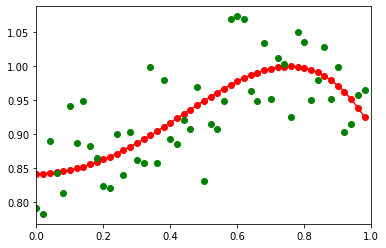

In [3]:
plt.plot(x, y, color = 'r')
plt.plot(x, y, 'ro')
plt.plot(x, y_noise, 'go')
plt.xlim(0.0, 1.0)
plt.show()

4. Compute the Gaussian process prediction of every input data sequentially, where each input data is taken randomly from the noise data

In [4]:
index_random_list = random.sample(range(50), 50)

def get_kernel_value(x_n, x_m, theta_0, theta_1, theta_2, theta_3):
    k_value = theta_0 * np.exp(-(theta_1/2)*np.power(np.linalg.norm((x_n-x_m)),2)) + theta_2 + theta_3*x_n.T*x_m
    return k_value


def gaussian_process(beta, theta_0, theta_1, theta_2, theta_3):
    
    for i in range(1, 51):
        N_i = i
        x_i = np.array([x[n] for n in index_random_list[:i]])
        y_noise_i = np.array([y_noise[n] for n in index_random_list[:i]])

        mu_new_list_i = []
        sigma_new_list_i = []
        for x_new in x:
            k_matrix = np.empty([N_i, 1])
            c_i = np.empty([N_i, N_i])

            for n, x_n in enumerate(x_i):
                k_matrix[n] = get_kernel_value(x_n, x_new, theta_0, theta_1, theta_2, theta_3)
                for m, x_m in enumerate(x_i):
                    if n == m :
                        c_i[n][m] = get_kernel_value(x_n, x_m, theta_0, theta_1, theta_2, theta_3) + (1 / beta)
                    else:
                        c_i[n][m] = get_kernel_value(x_n, x_m, theta_0, theta_1, theta_2, theta_3)

            c_new = get_kernel_value(x_new, x_new, theta_0, theta_1, theta_2, theta_3) + (1 / beta)

            mu_new = k_matrix.T.dot(np.linalg.inv(c_i)).dot(y_noise_i)[0]
            mu_new_list_i.append(mu_new)

            sigma_new = c_new - k_matrix.T.dot(np.linalg.inv(c_i)).dot(k_matrix)[0][0]
            sigma_new_list_i.append(sigma_new)

        # plot the graph
        plt.errorbar(x, mu_new_list_i, sigma_new_list_i, marker = "^", ecolor = "b", elinewidth = 1, capsize = 2)
        plt.plot(x, y, color = 'r')
        plt.plot(x, y, 'ro')
        plt.plot(x, y_noise, 'go')
        plt.xlim(0.0, 1.0)
        plt.show()
        print(index_random_list[:i])

5. Use the kernel we discuss in class (textbook's Eq. (6.63), page 307), by setting thetas: (1.0, 4.0, 0.0, 0.0)

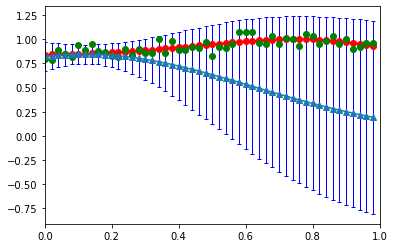

[6]


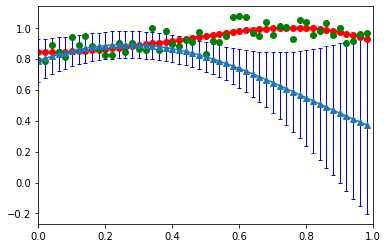

[6, 25]


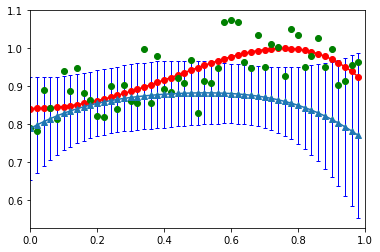

[6, 25, 38]


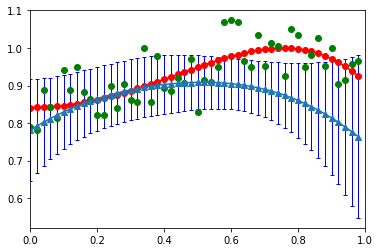

[6, 25, 38, 28]


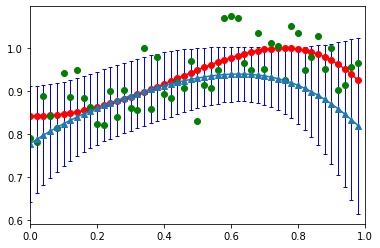

[6, 25, 38, 28, 34]


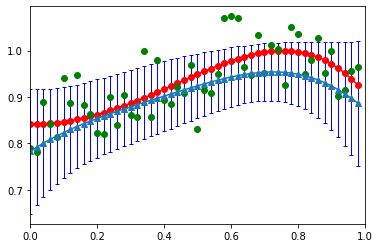

[6, 25, 38, 28, 34, 42]


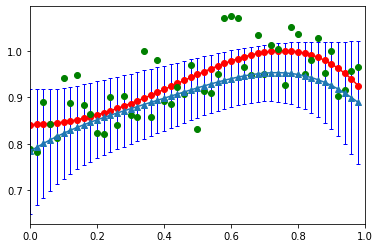

[6, 25, 38, 28, 34, 42, 26]


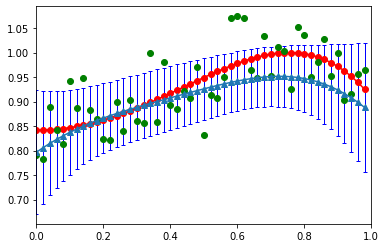

[6, 25, 38, 28, 34, 42, 26, 12]


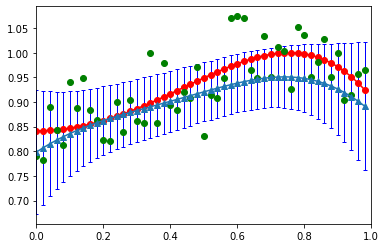

[6, 25, 38, 28, 34, 42, 26, 12, 21]


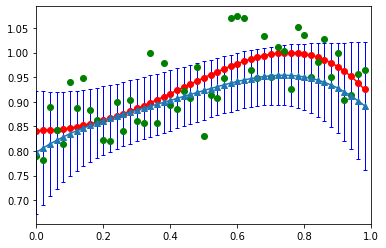

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32]


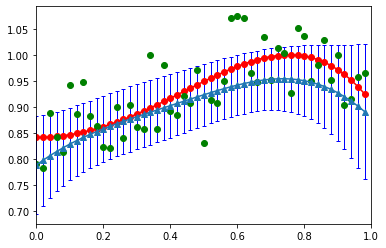

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4]


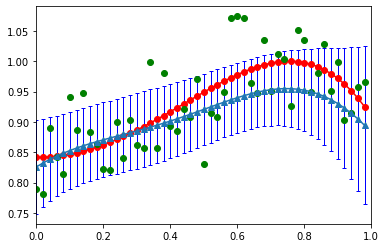

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2]


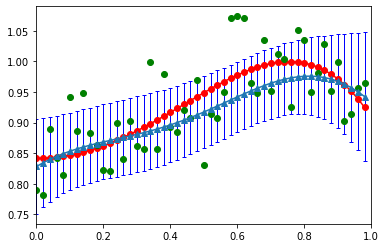

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43]


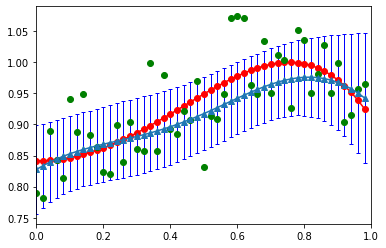

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3]


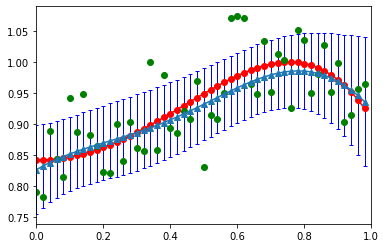

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31]


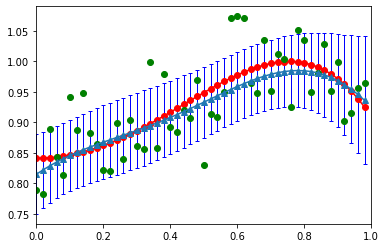

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0]


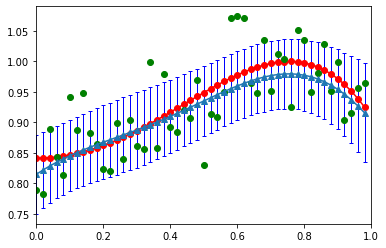

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47]


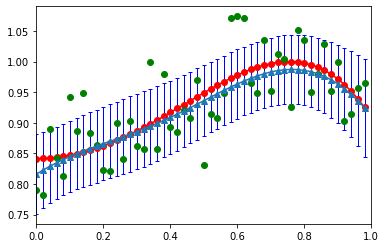

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40]


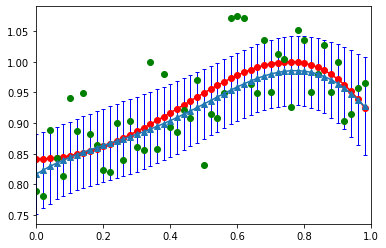

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27]


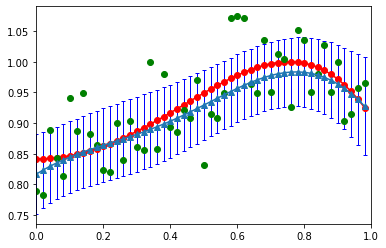

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33]


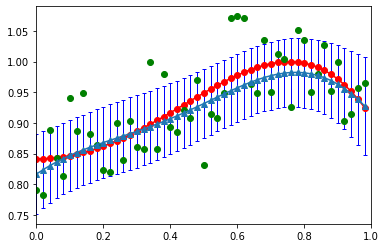

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14]


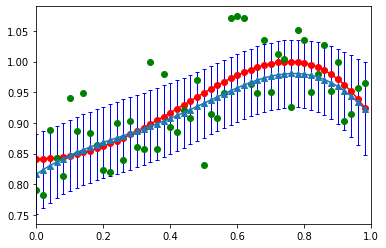

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44]


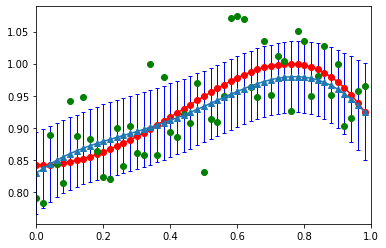

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5]


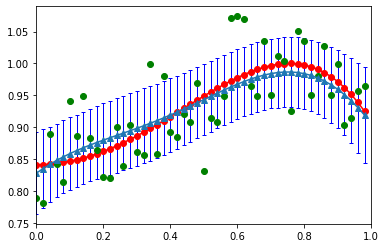

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30]


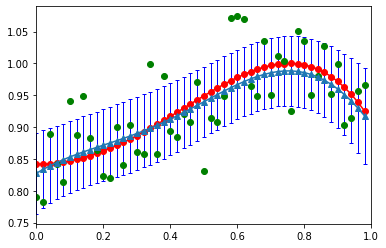

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11]


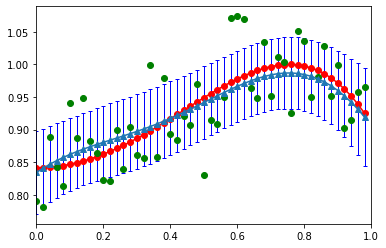

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7]


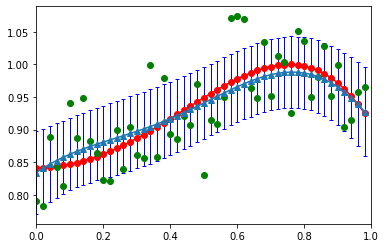

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48]


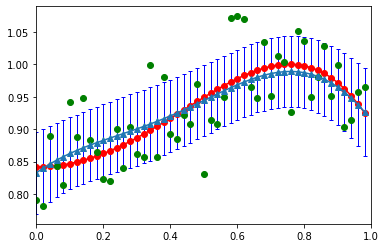

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24]


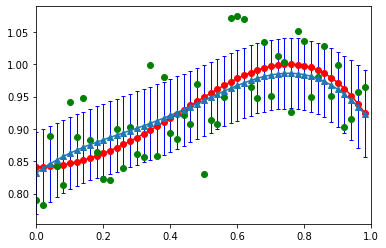

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41]


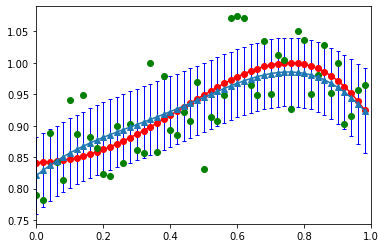

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1]


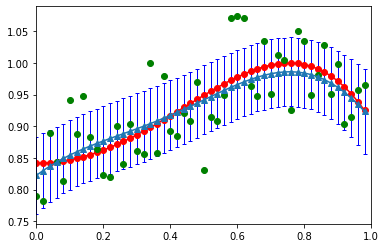

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16]


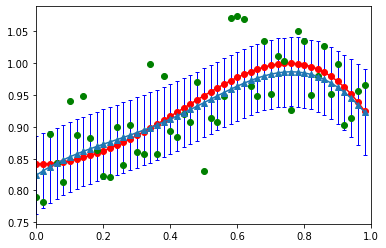

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18]


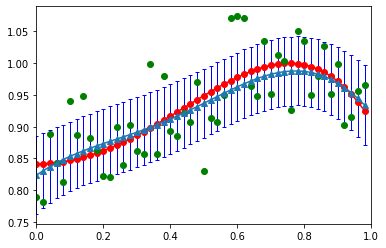

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49]


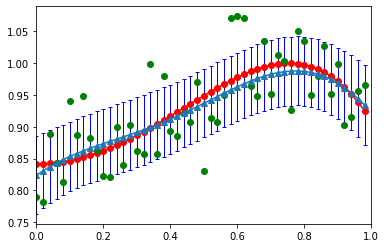

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22]


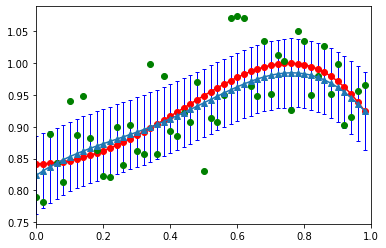

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46]


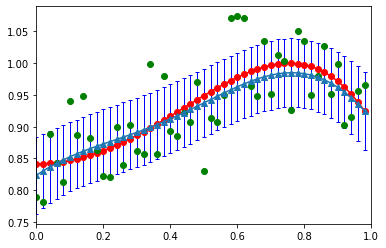

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9]


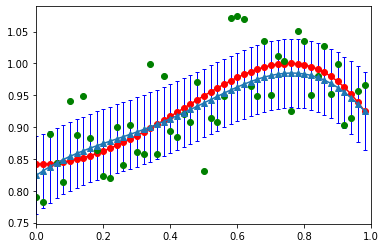

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8]


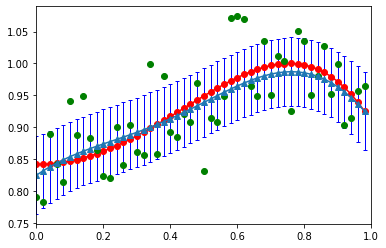

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36]


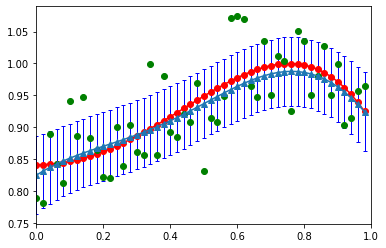

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13]


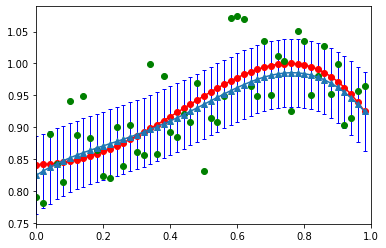

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35]


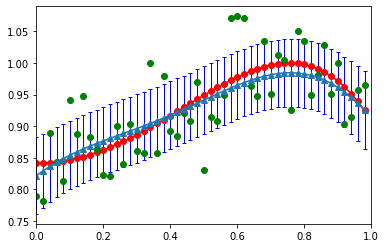

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17]


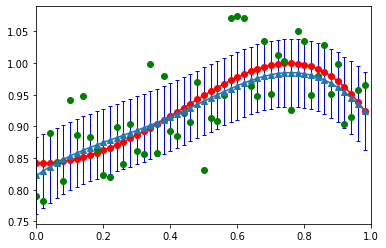

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15]


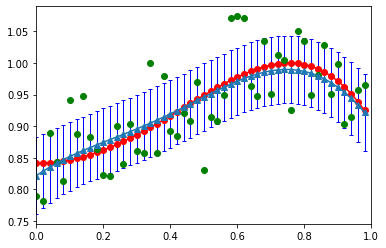

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29]


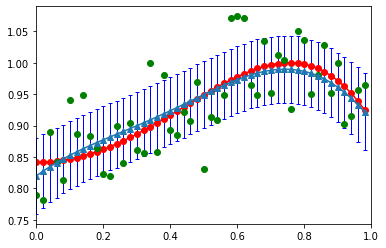

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19]


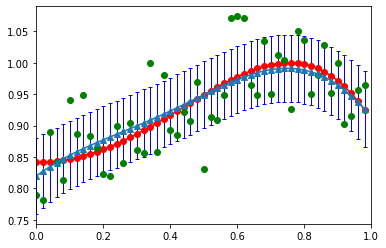

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45]


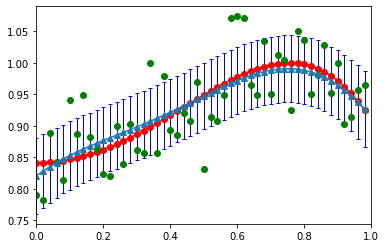

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23]


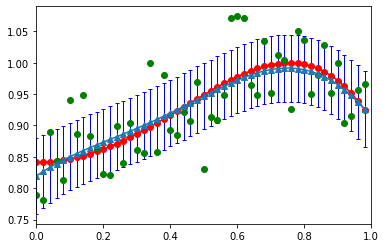

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10]


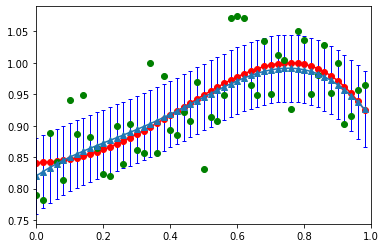

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20]


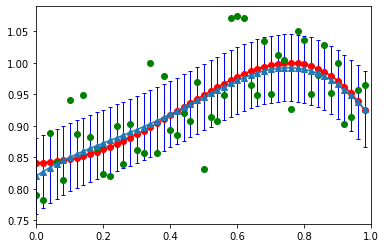

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20, 37]


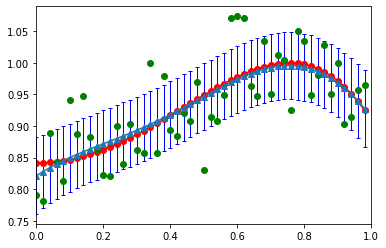

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20, 37, 39]


In [5]:
gaussian_process(beta = 20, theta_0 = 1.0, theta_1 = 4.0, theta_2 = 0.0, theta_3 = 0.0)

6. Experiment with your code by changing beta, and explain what beta is for and how it affects the results.

6.1 decrease beta to 5

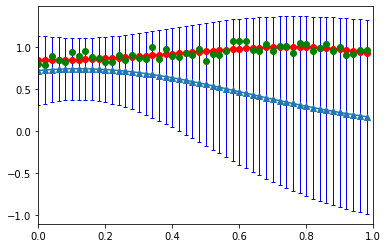

[6]


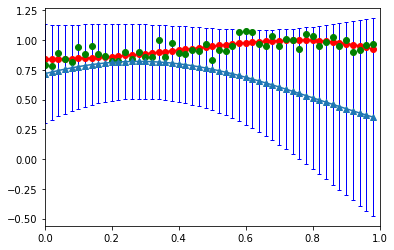

[6, 25]


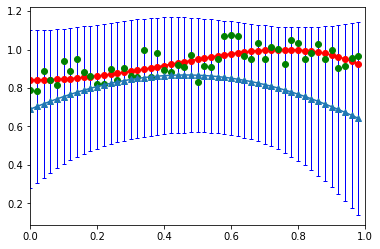

[6, 25, 38]


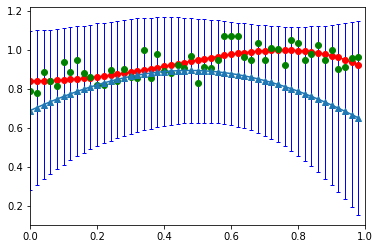

[6, 25, 38, 28]


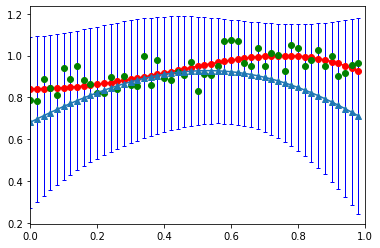

[6, 25, 38, 28, 34]


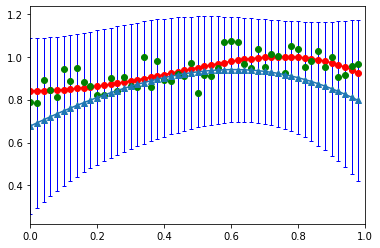

[6, 25, 38, 28, 34, 42]


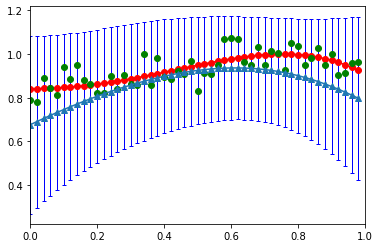

[6, 25, 38, 28, 34, 42, 26]


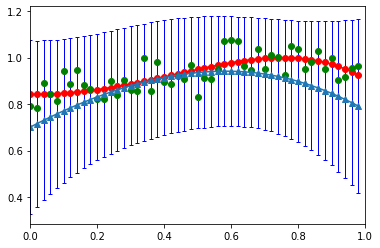

[6, 25, 38, 28, 34, 42, 26, 12]


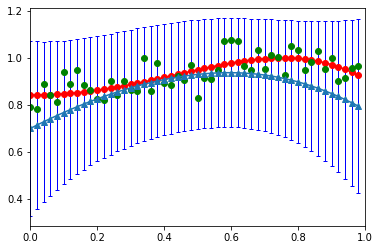

[6, 25, 38, 28, 34, 42, 26, 12, 21]


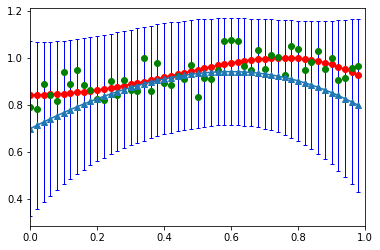

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32]


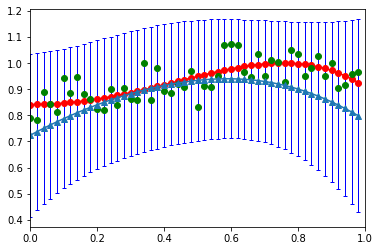

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4]


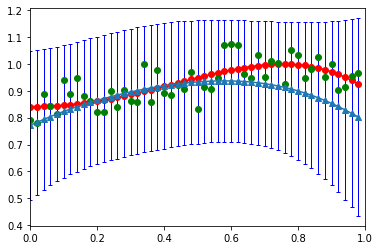

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2]


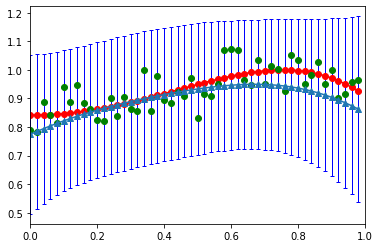

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43]


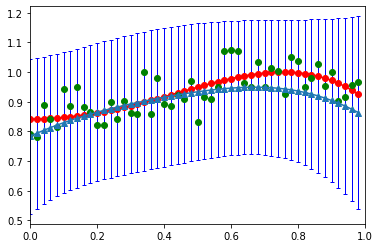

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3]


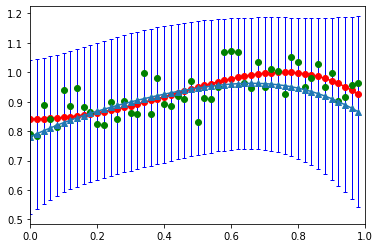

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31]


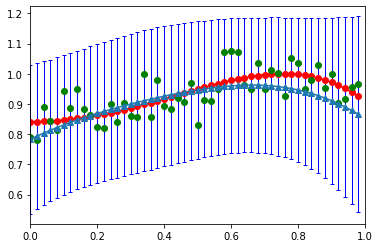

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0]


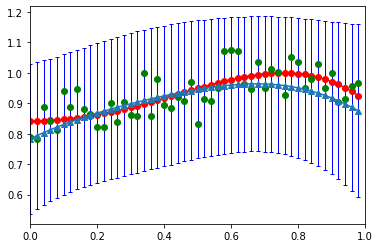

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47]


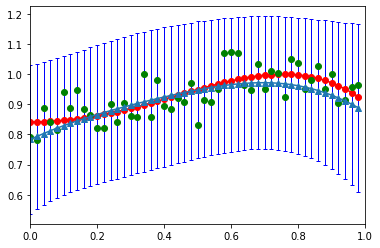

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40]


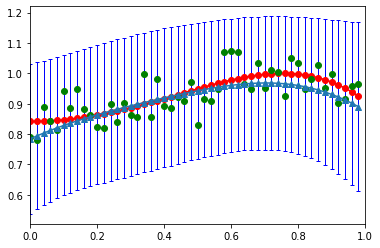

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27]


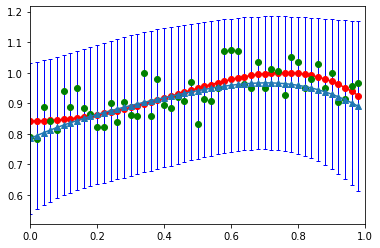

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33]


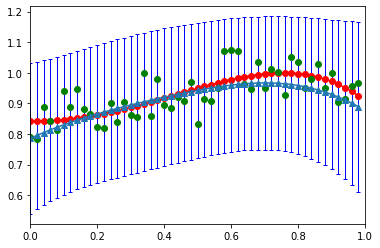

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14]


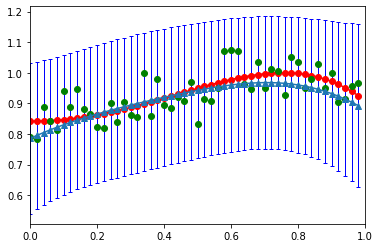

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44]


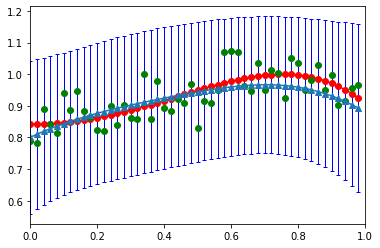

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5]


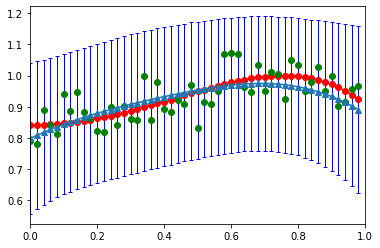

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30]


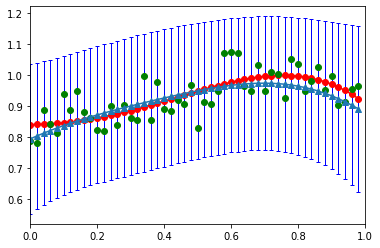

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11]


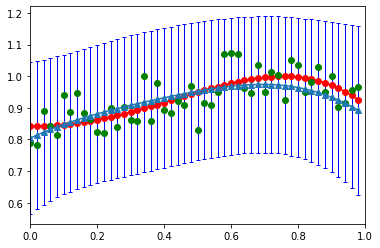

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7]


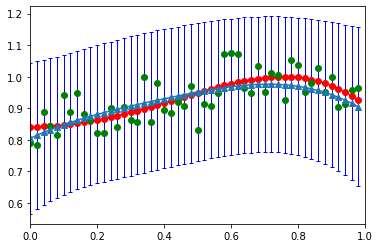

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48]


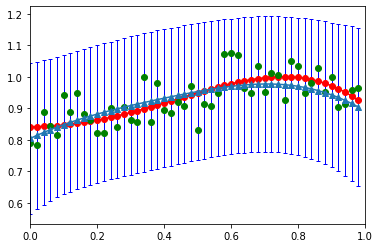

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24]


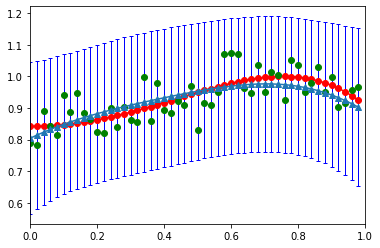

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41]


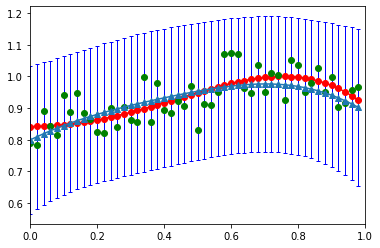

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1]


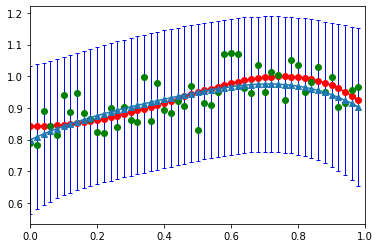

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16]


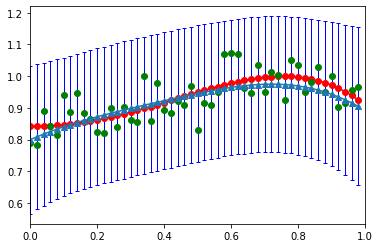

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18]


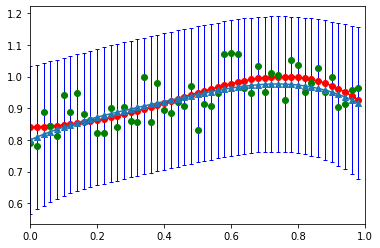

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49]


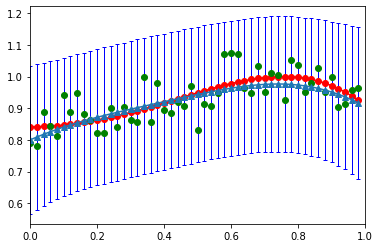

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22]


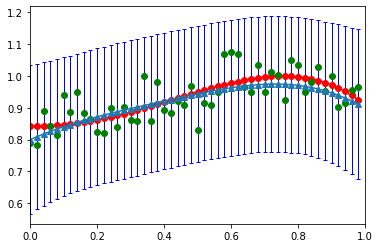

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46]


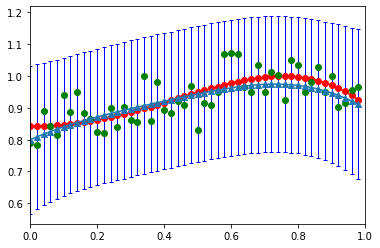

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9]


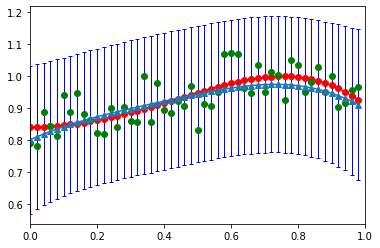

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8]


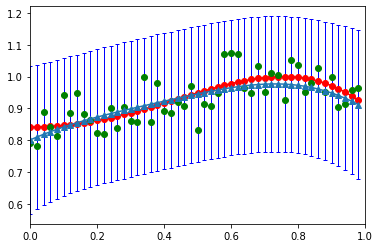

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36]


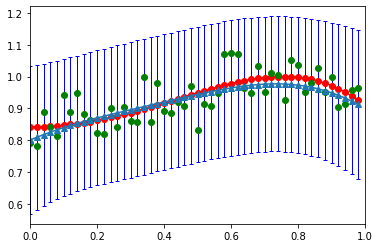

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13]


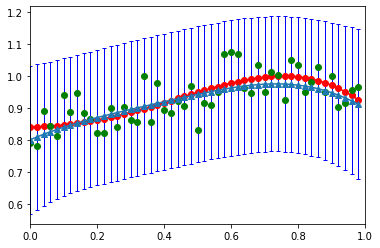

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35]


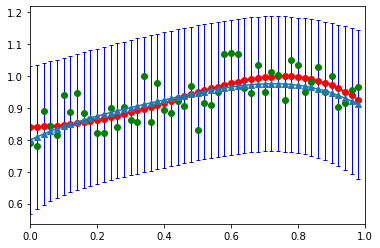

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17]


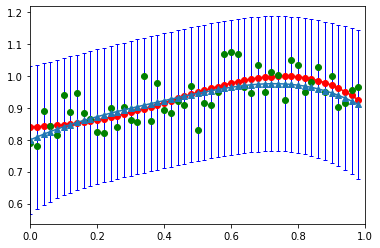

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15]


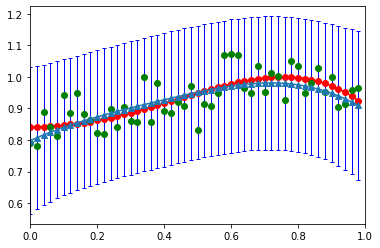

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29]


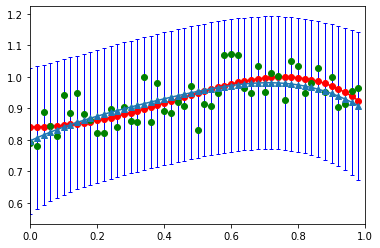

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19]


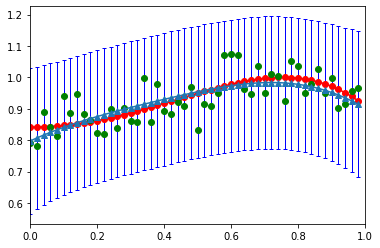

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45]


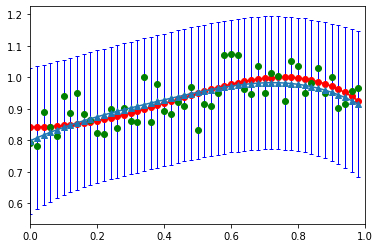

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23]


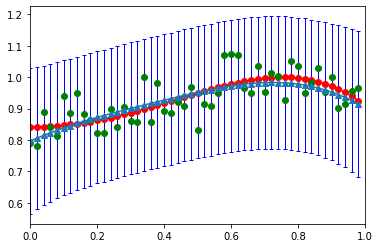

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10]


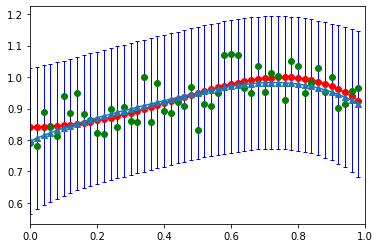

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20]


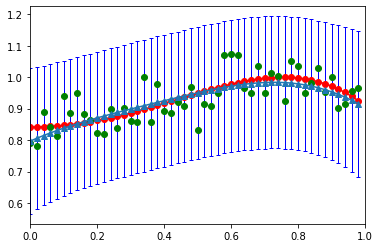

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20, 37]


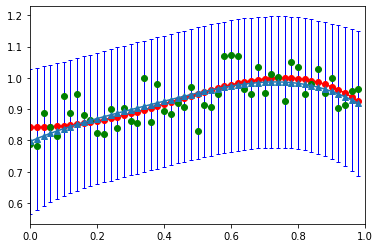

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20, 37, 39]


In [6]:
gaussian_process(beta = 5, theta_0 = 1.0, theta_1 = 4.0, theta_2 = 0.0, theta_3 = 0.0)

6.2 increase beta to 500

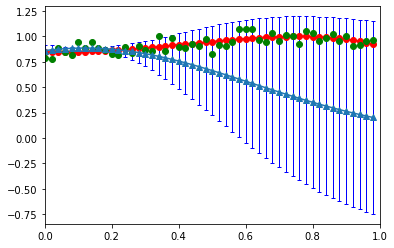

[6]


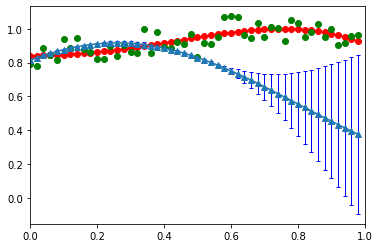

[6, 25]


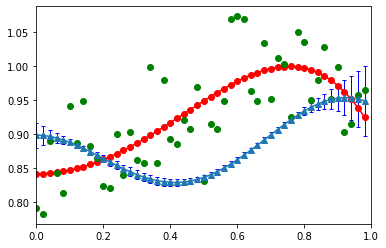

[6, 25, 38]


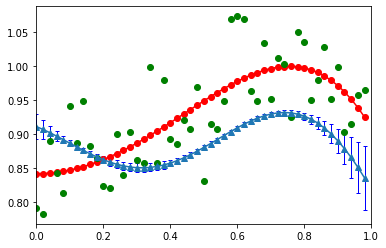

[6, 25, 38, 28]


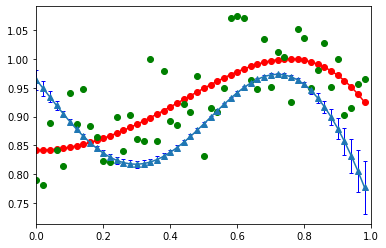

[6, 25, 38, 28, 34]


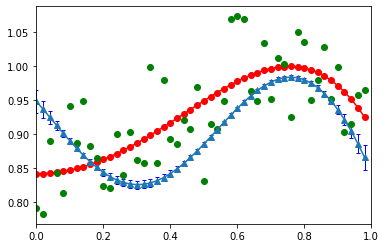

[6, 25, 38, 28, 34, 42]


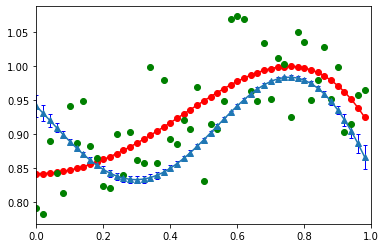

[6, 25, 38, 28, 34, 42, 26]


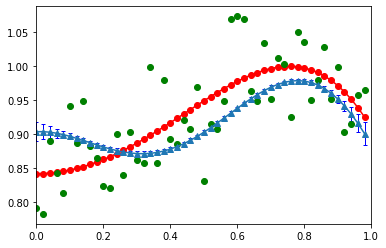

[6, 25, 38, 28, 34, 42, 26, 12]


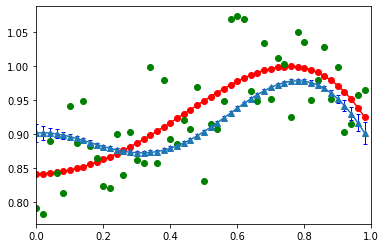

[6, 25, 38, 28, 34, 42, 26, 12, 21]


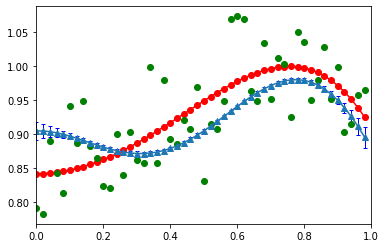

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32]


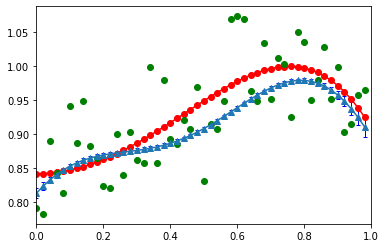

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4]


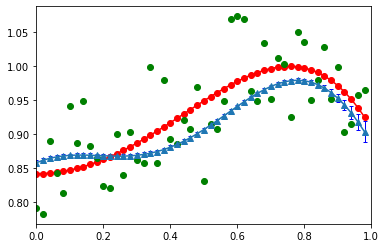

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2]


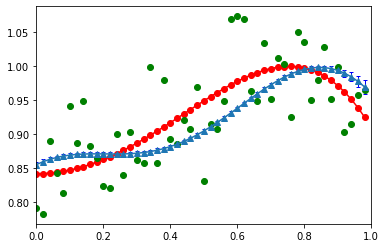

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43]


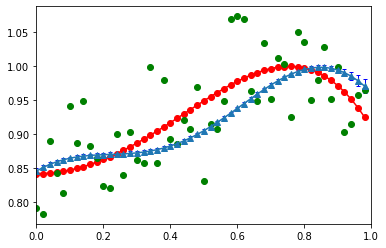

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3]


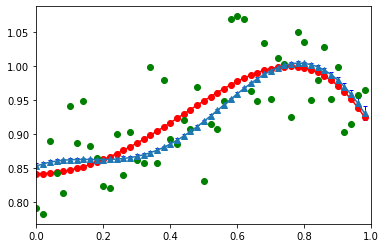

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31]


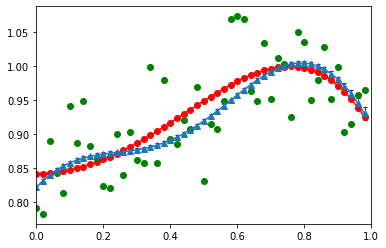

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0]


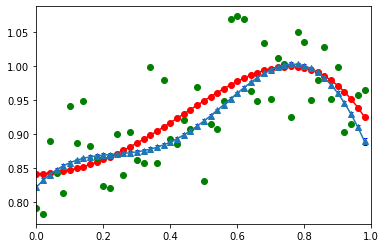

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47]


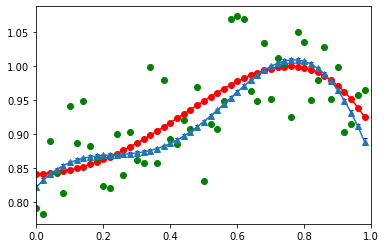

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40]


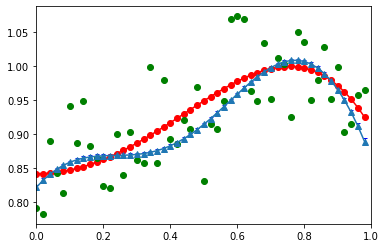

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27]


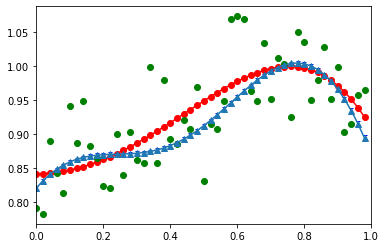

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33]


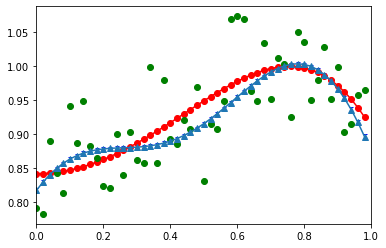

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14]


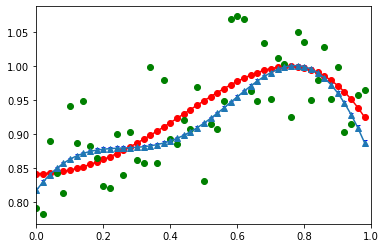

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44]


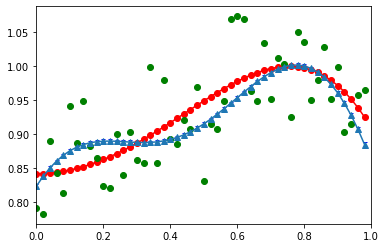

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5]


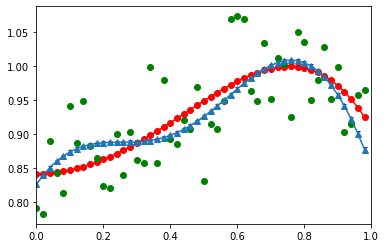

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30]


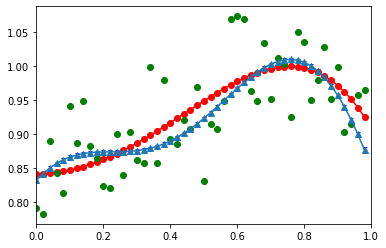

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11]


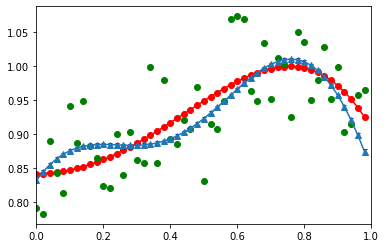

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7]


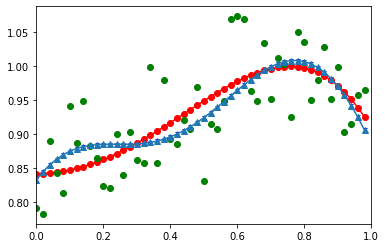

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48]


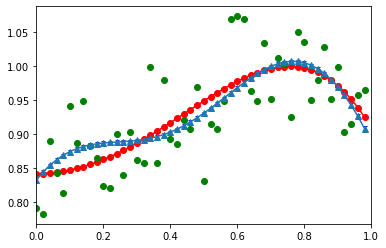

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24]


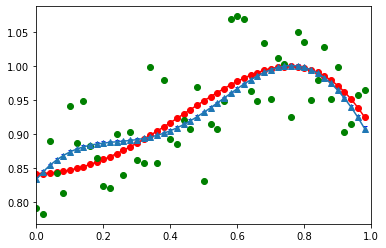

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41]


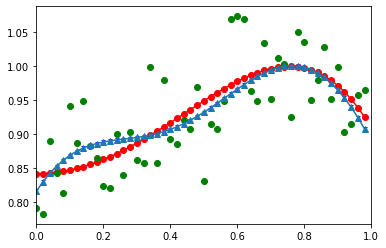

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1]


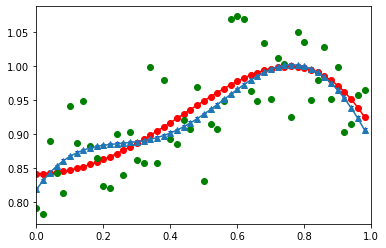

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16]


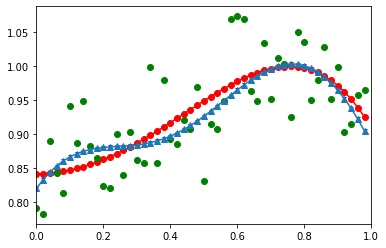

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18]


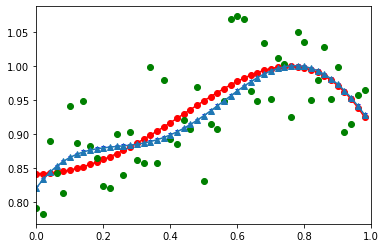

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49]


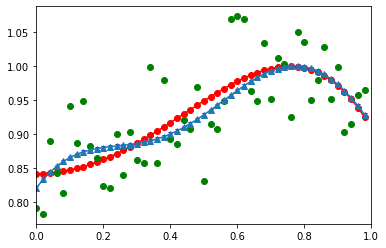

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22]


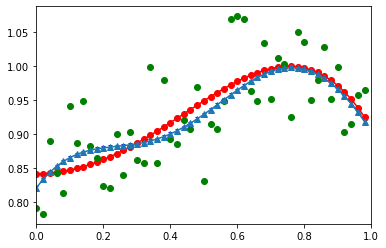

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46]


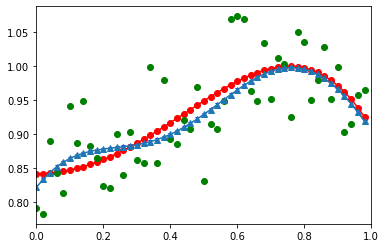

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9]


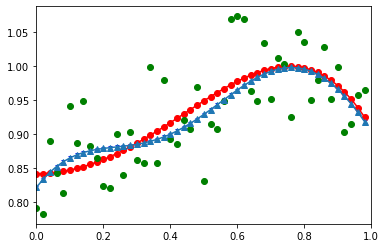

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8]


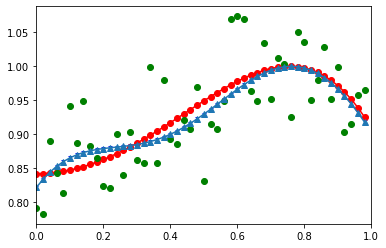

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36]


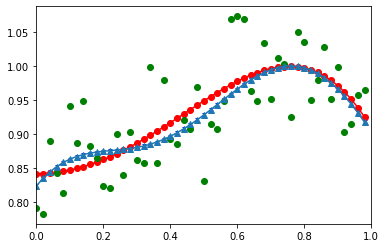

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13]


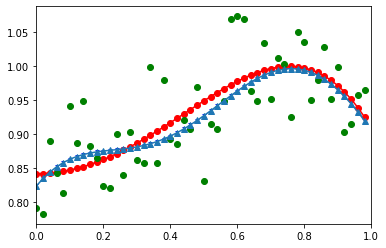

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35]


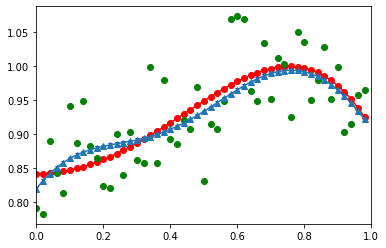

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17]


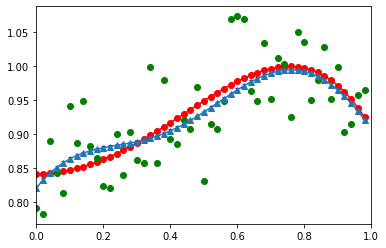

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15]


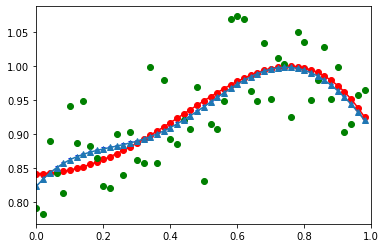

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29]


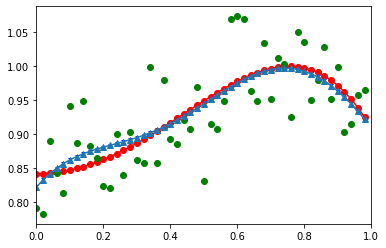

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19]


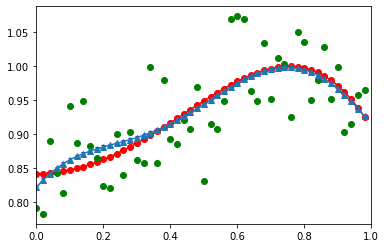

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45]


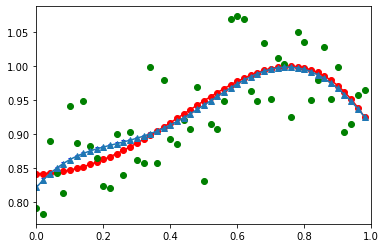

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23]


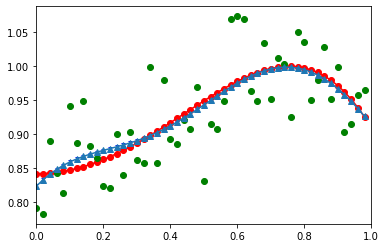

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10]


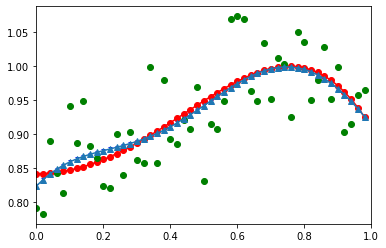

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20]


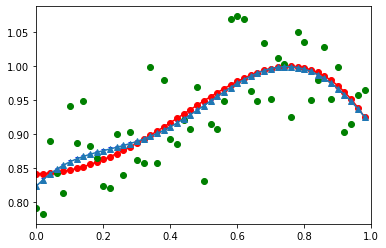

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20, 37]


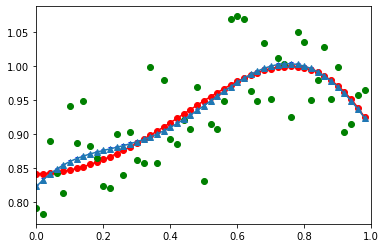

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20, 37, 39]


In [7]:
gaussian_process(beta = 500, theta_0 = 1.0, theta_1 = 4.0, theta_2 = 0.0, theta_3 = 0.0)

6. The range of uncertainty of prediction heavily depends on beta. If we decrease beta to 5 (as in the first scenario), the range of uncertainty will increase. While if we increase beta to 500 (as in the second secnario) the range of uncertainty will quickly drop to extremely small after a few sequential ingestion of data. 

Intuitively, the inverse of beta represents the noise level of data (or we could say the *assumption* we have for the noise level of data). If the noise level is large, then we are more likely to be uncertain with our prediction. One the other hand, if the noise level is small, then we are more likely to be very certain with our prediction.

Mathematically, it is not hard to understand. If we look at the equation for standard deviation for Gaussian processing, we will find that $$\Sigma_* = c_* - \bar{k}_*^T \mathbb{C}^{-1}\bar{k}_* = k(x_*, x_*) + \beta^{-1} - \bar{k}_*^T \mathbb{C}^{-1}\bar{k}_*.$$ If we decrease the value of beta, we will find that $\Sigma_*$ increases.

7. Show your best prediction results for all 50 data one by one:

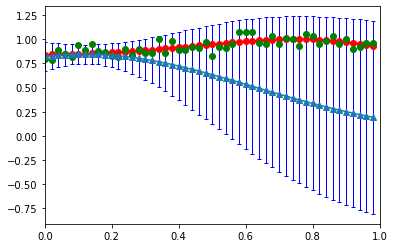

[6]


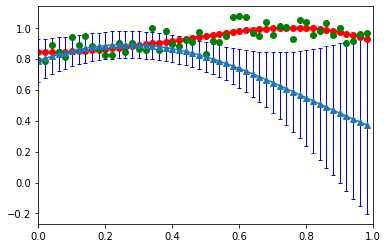

[6, 25]


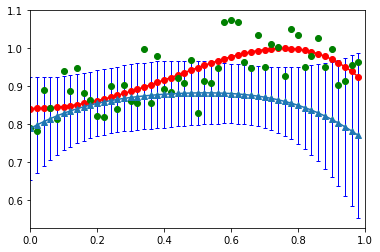

[6, 25, 38]


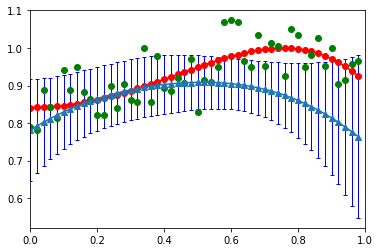

[6, 25, 38, 28]


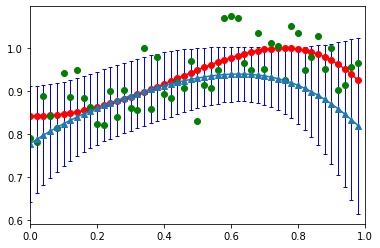

[6, 25, 38, 28, 34]


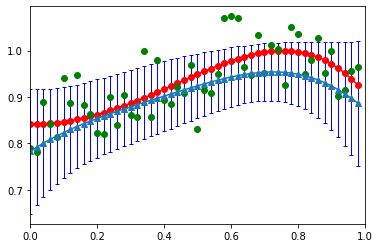

[6, 25, 38, 28, 34, 42]


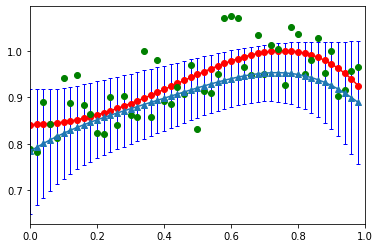

[6, 25, 38, 28, 34, 42, 26]


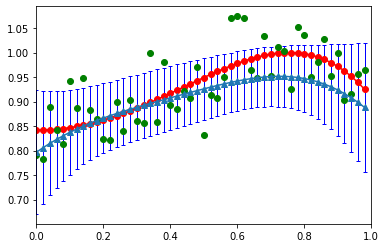

[6, 25, 38, 28, 34, 42, 26, 12]


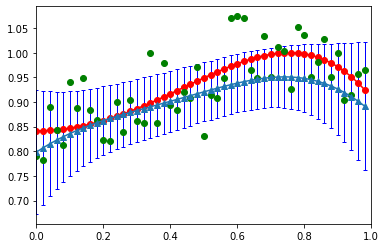

[6, 25, 38, 28, 34, 42, 26, 12, 21]


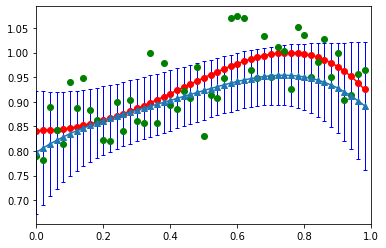

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32]


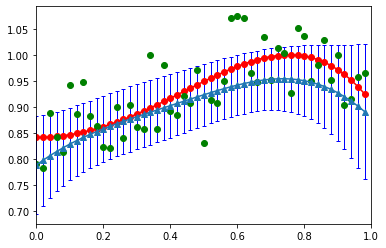

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4]


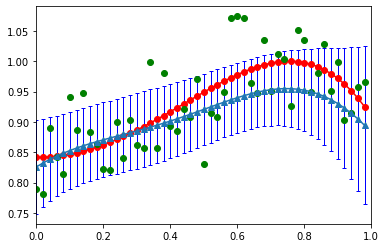

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2]


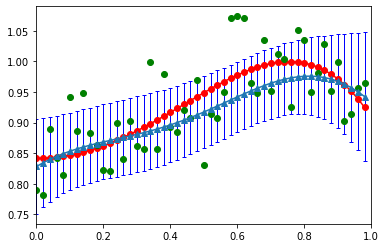

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43]


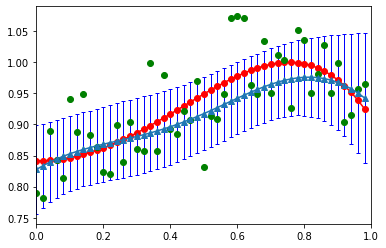

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3]


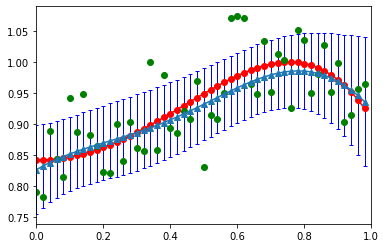

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31]


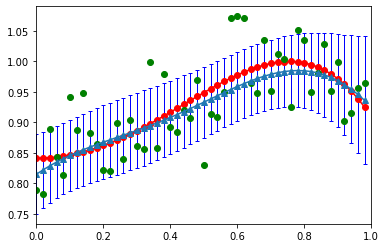

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0]


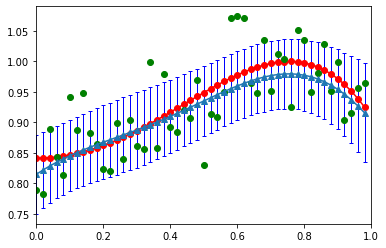

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47]


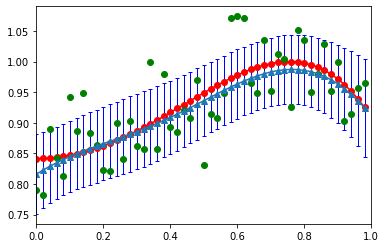

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40]


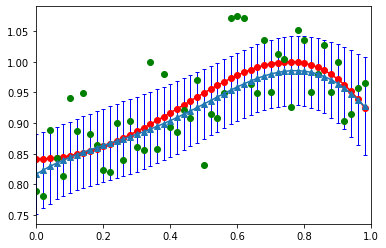

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27]


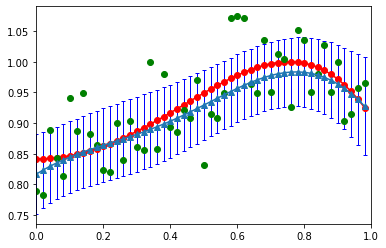

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33]


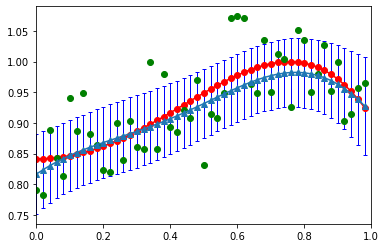

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14]


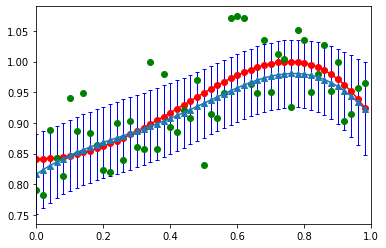

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44]


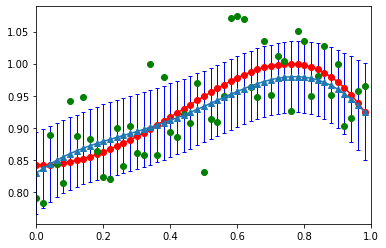

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5]


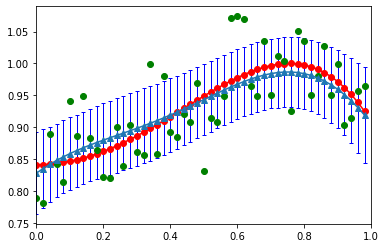

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30]


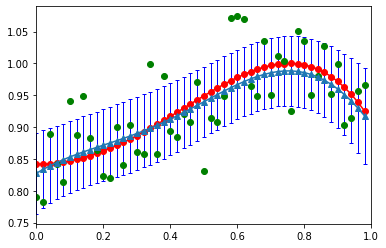

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11]


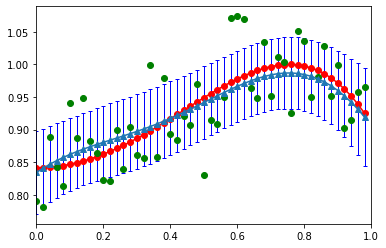

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7]


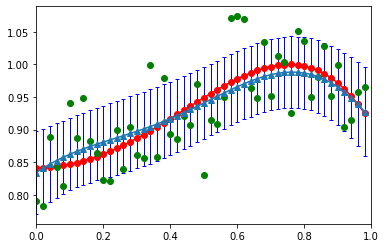

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48]


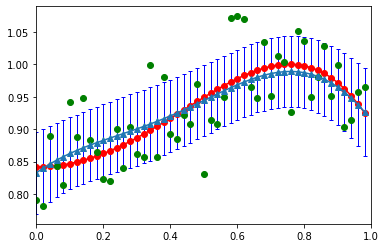

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24]


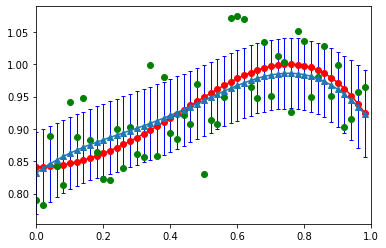

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41]


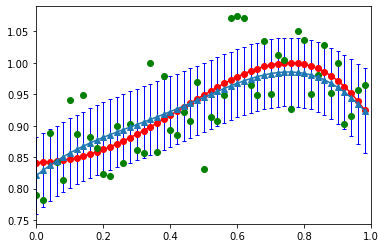

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1]


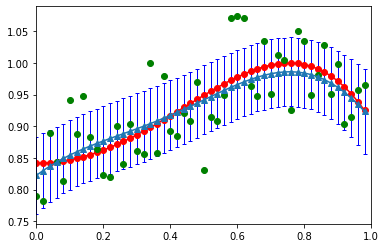

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16]


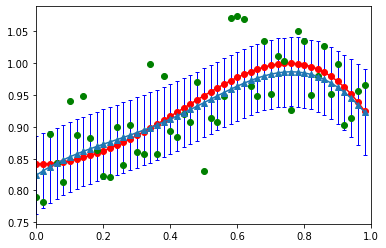

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18]


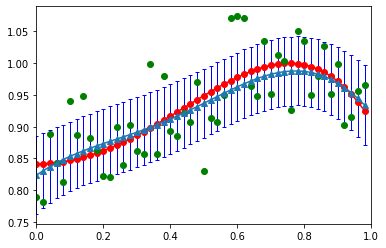

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49]


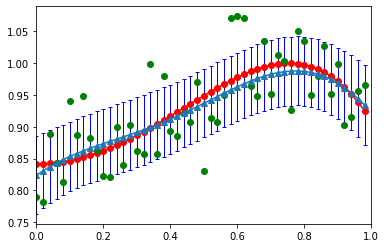

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22]


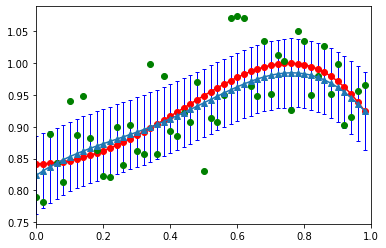

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46]


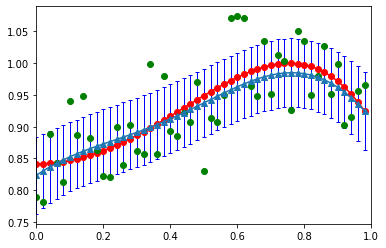

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9]


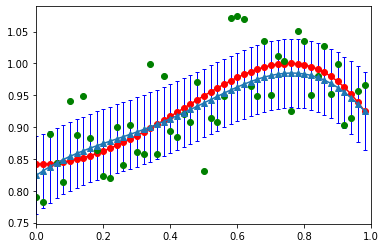

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8]


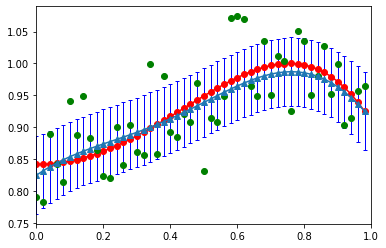

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36]


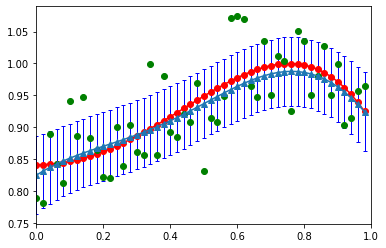

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13]


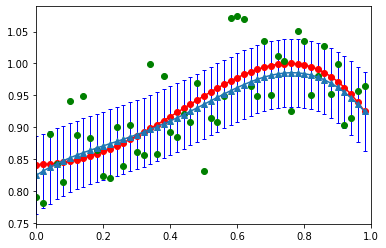

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35]


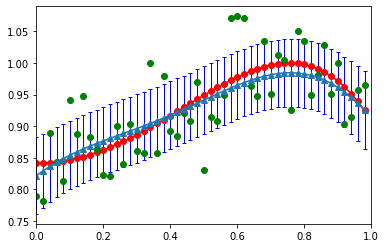

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17]


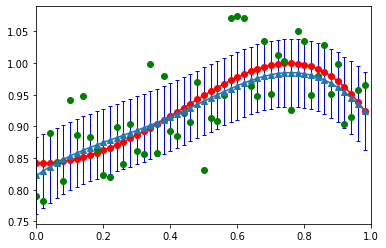

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15]


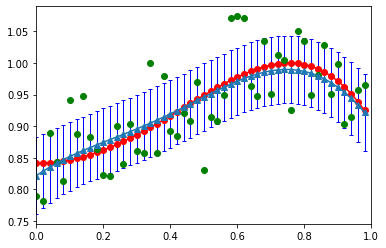

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29]


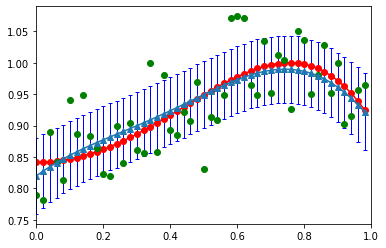

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19]


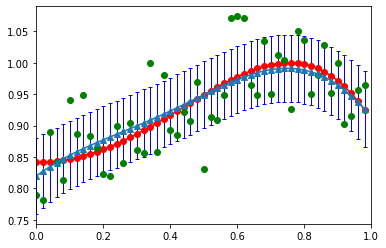

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45]


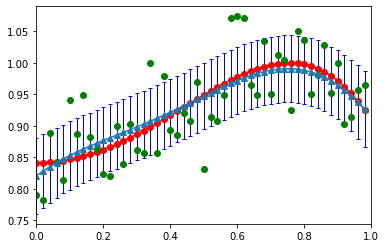

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23]


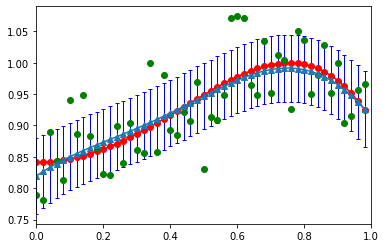

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10]


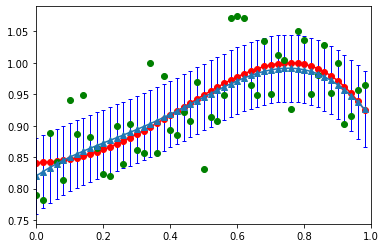

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20]


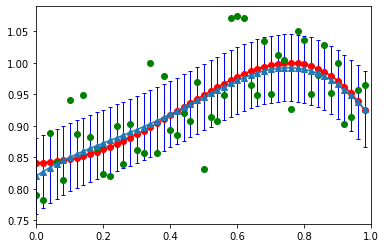

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20, 37]


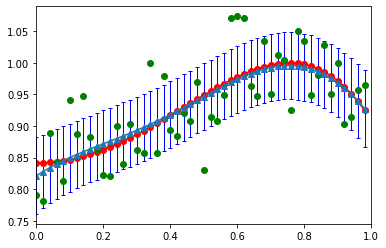

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20, 37, 39]


In [8]:
gaussian_process(beta = 20, theta_0 = 1.0, theta_1 = 4.0, theta_2 = 0.0, theta_3 = 0.0)

8. Change the kernel's parameters, thetas: (1.0, 64.0, 10.0, 5.0), and show the results.

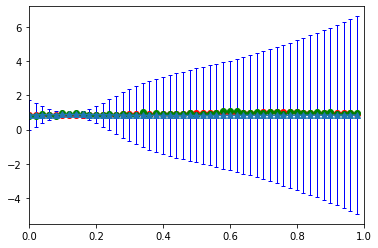

[6]


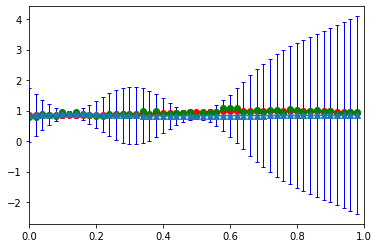

[6, 25]


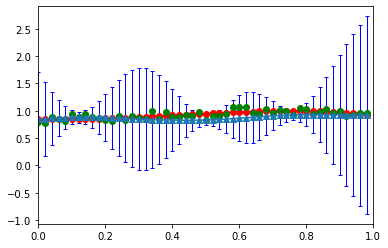

[6, 25, 38]


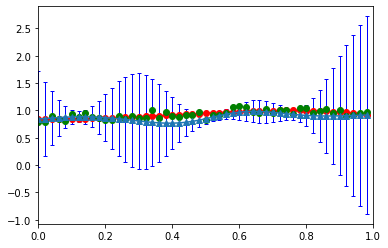

[6, 25, 38, 28]


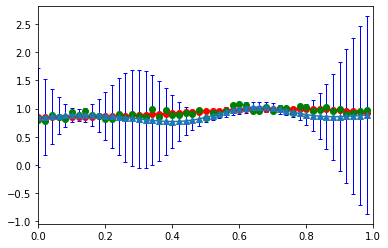

[6, 25, 38, 28, 34]


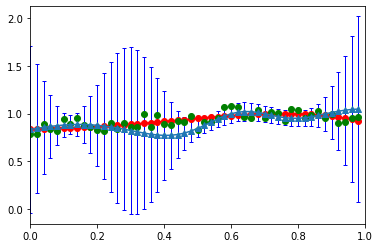

[6, 25, 38, 28, 34, 42]


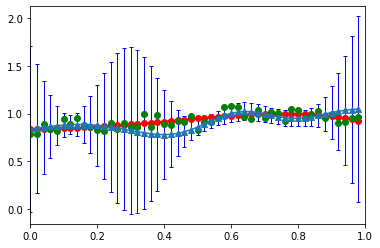

[6, 25, 38, 28, 34, 42, 26]


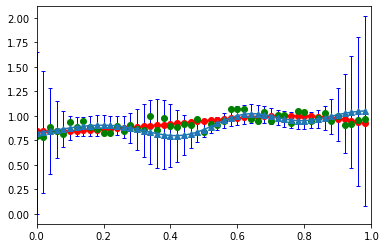

[6, 25, 38, 28, 34, 42, 26, 12]


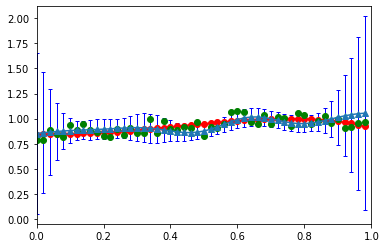

[6, 25, 38, 28, 34, 42, 26, 12, 21]


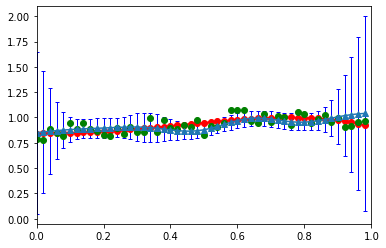

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32]


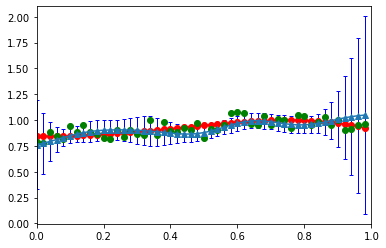

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4]


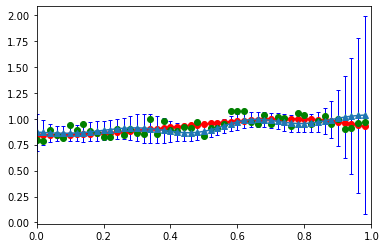

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2]


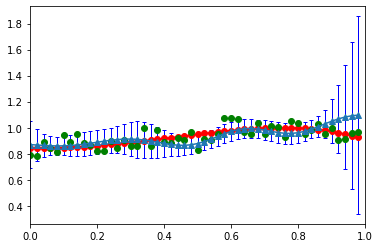

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43]


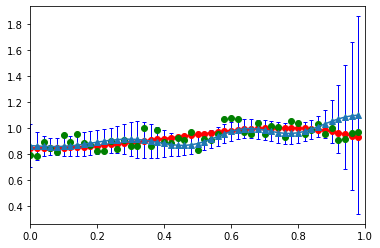

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3]


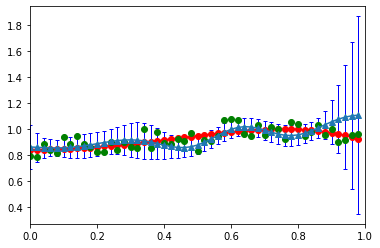

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31]


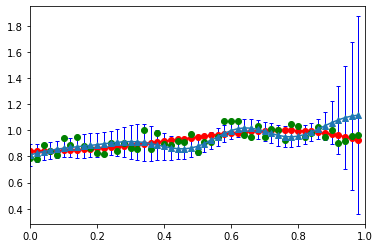

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0]


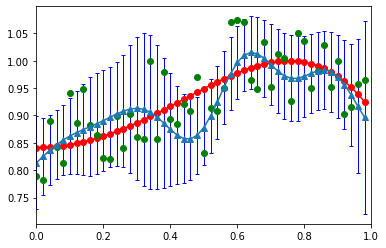

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47]


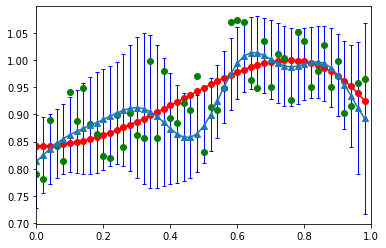

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40]


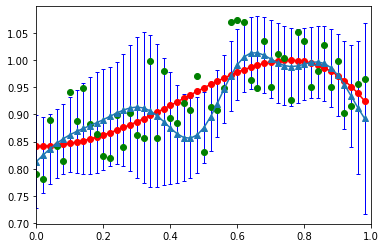

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27]


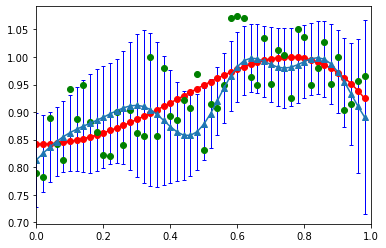

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33]


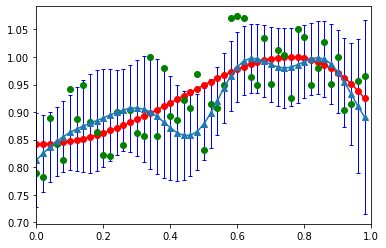

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14]


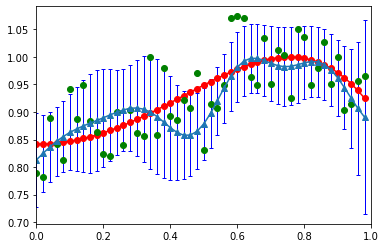

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44]


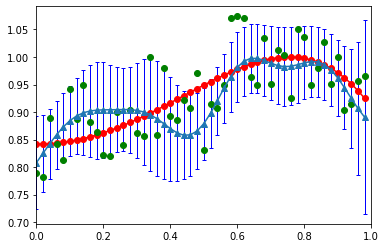

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5]


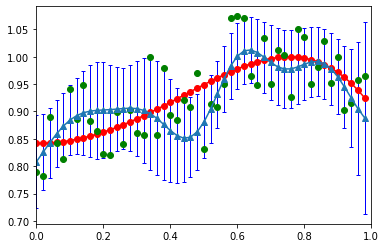

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30]


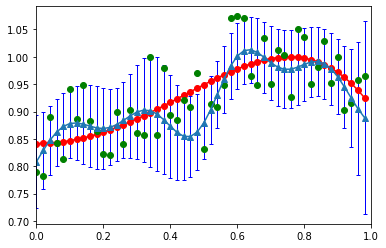

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11]


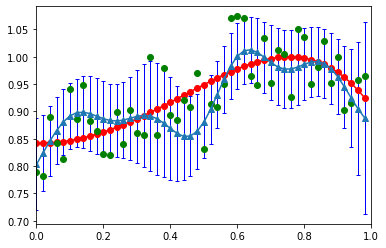

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7]


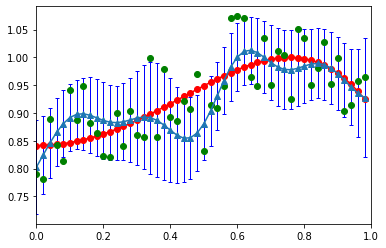

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48]


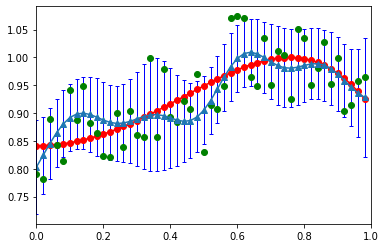

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24]


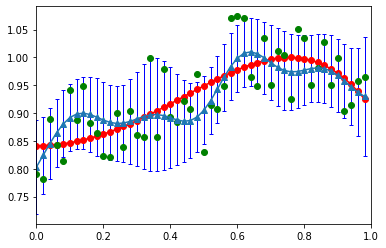

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41]


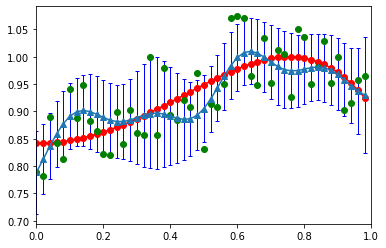

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1]


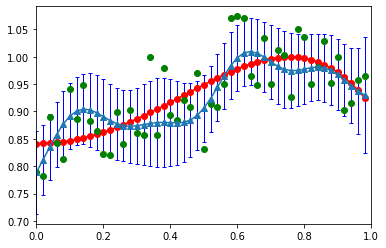

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16]


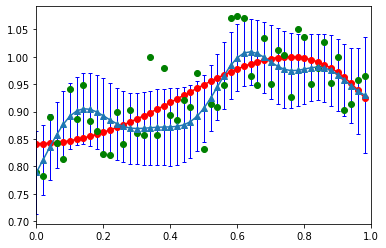

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18]


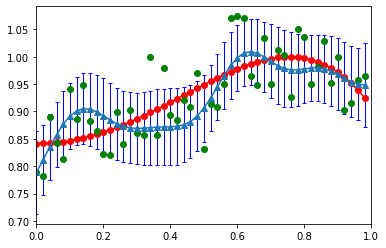

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49]


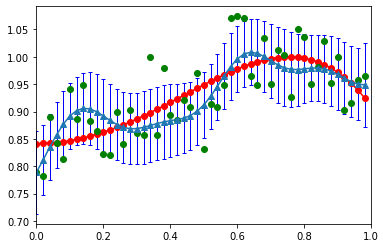

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22]


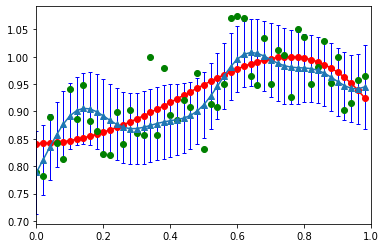

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46]


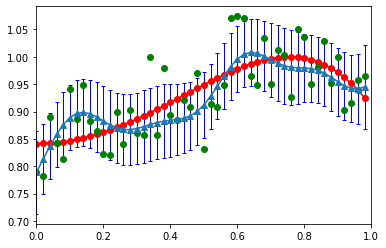

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9]


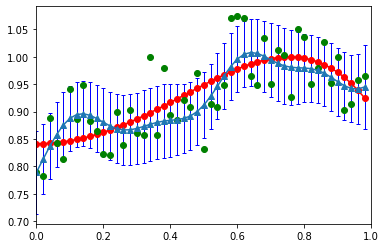

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8]


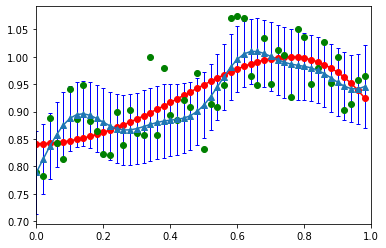

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36]


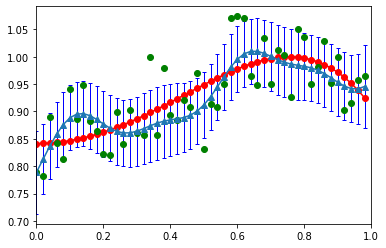

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13]


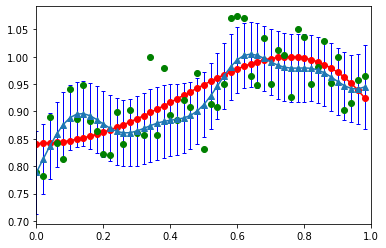

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35]


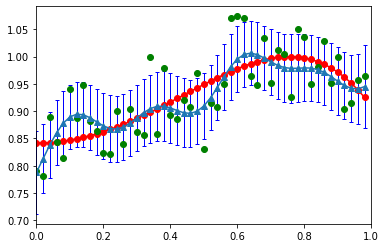

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17]


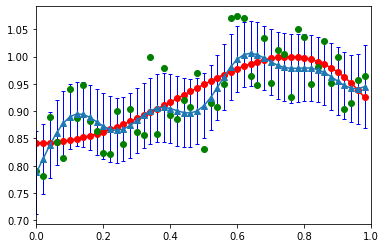

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15]


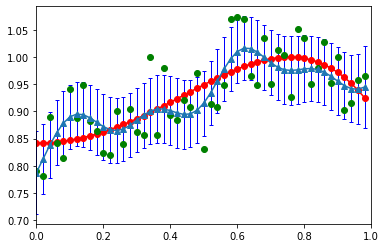

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29]


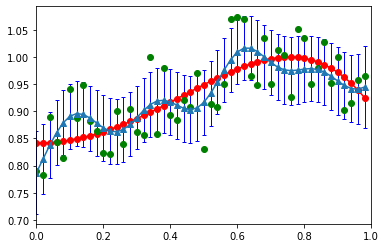

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19]


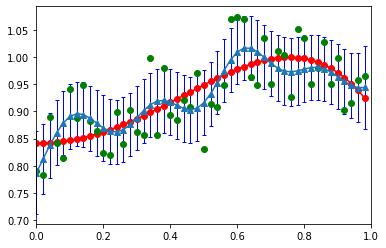

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45]


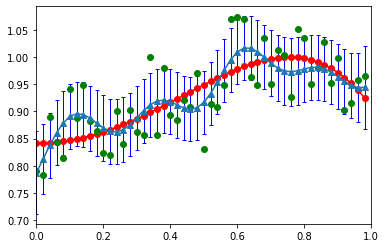

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23]


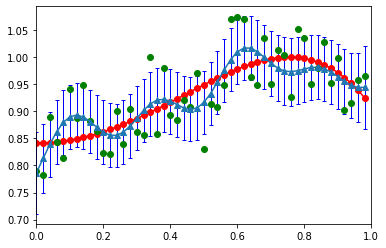

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10]


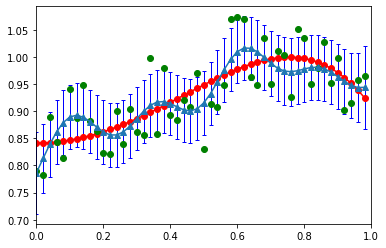

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20]


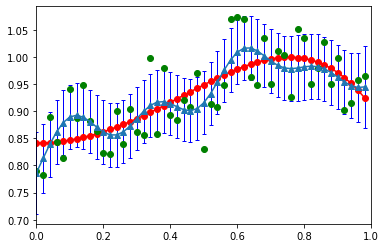

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20, 37]


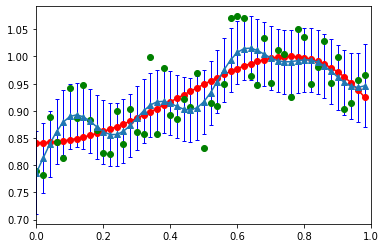

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20, 37, 39]


In [9]:
gaussian_process(beta = 20, theta_0 = 1.0, theta_1 = 64.0, theta_2 = 10.0, theta_3 = 5.0)

9. Explain what the effects of changing to this kernel on the prediction.

As we can observe from the computation, the curve-fitting becomes much more overfitted than using the original kernel. The uncertainty range also fluctuates dramatically for the first few graphs. 

Because the Gaussian processing replaces the basis function with kernels to support the expressiveness of curve-fitting/prediction, in order to find out the reason why such changes to the kernel will make the prediction more expressive and prone to overfit, we need to look at the kernel function and the effect of hyper-parameters.

As we can observe in the textbook page 308, if we increase theta_1 from 4 to 64, the kernel function become much denser. Therefore, this increase in theta_1 will provide much more expressiveness for the curve-fitting within the same range of data.

If we increase theta_2 from 0 to 10, we will observe that distance between each curve increases. Again, this would allow even more expression for larger range of predictions.

And finally, if we increase theta_3 from 0 to 5, we will observe not only the vertical range increases, the slope of curve of also increases dramatically.

Therefore, the kernel function has become much denser, covers larger range, and has steeper slope. All these features combined will mean more expressiveness and more changes of curve-fitting. If we think of kernel function as a infinite number of basis function, it is quite similar to having denser mu, larger vertical range and smaller standard deviation of basis. Hence the prediction/curve-fitting is more likely to be overfitting.

10. Change the kernel's parameters, thetas: (1.0, 0.25, 0.0, 0.0), and show the results.

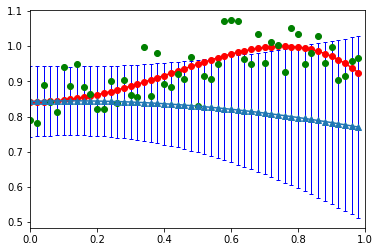

[6]


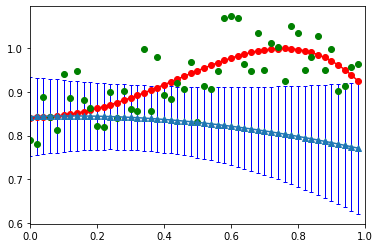

[6, 25]


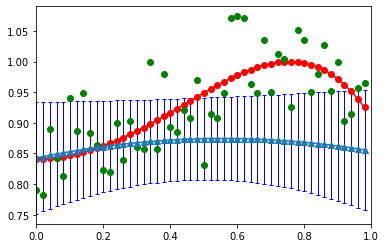

[6, 25, 38]


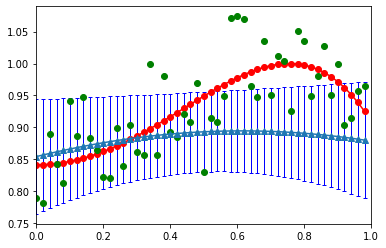

[6, 25, 38, 28]


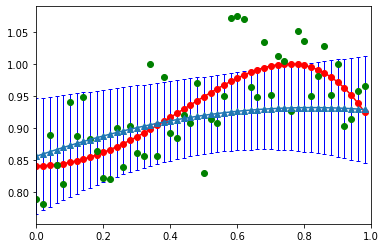

[6, 25, 38, 28, 34]


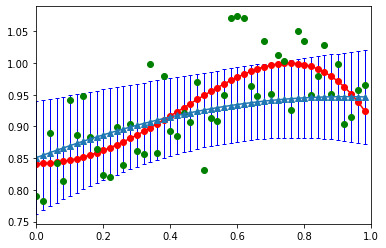

[6, 25, 38, 28, 34, 42]


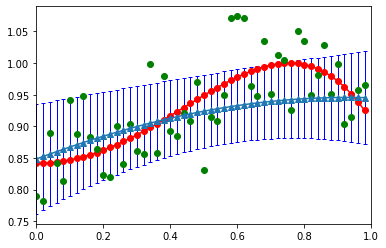

[6, 25, 38, 28, 34, 42, 26]


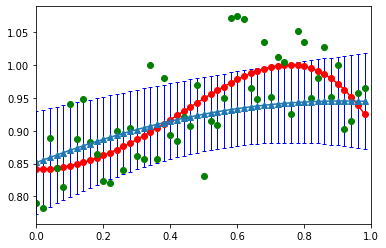

[6, 25, 38, 28, 34, 42, 26, 12]


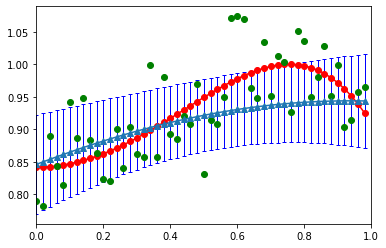

[6, 25, 38, 28, 34, 42, 26, 12, 21]


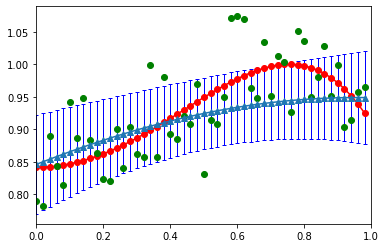

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32]


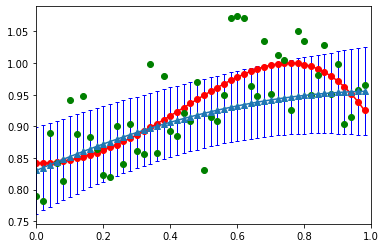

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4]


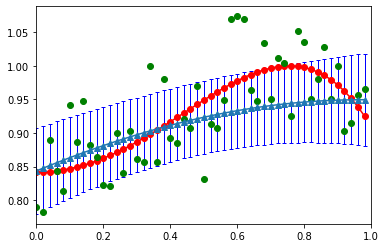

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2]


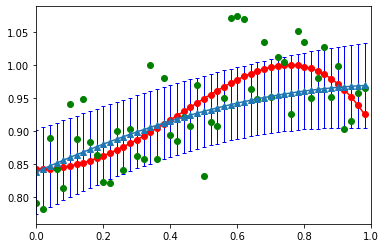

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43]


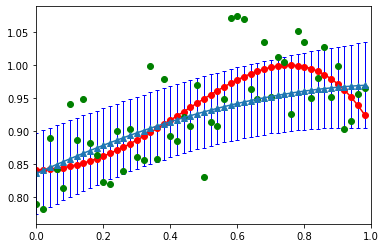

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3]


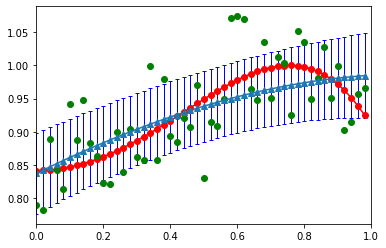

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31]


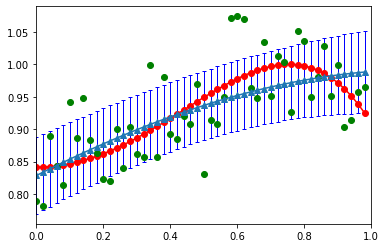

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0]


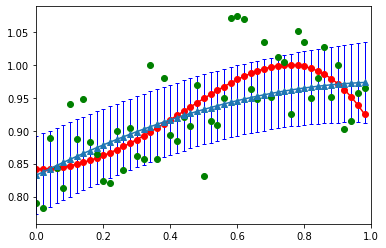

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47]


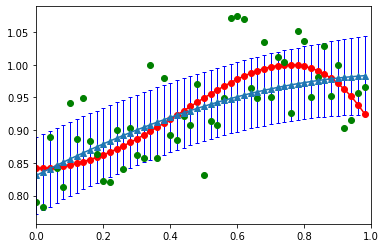

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40]


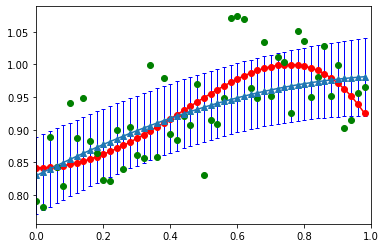

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27]


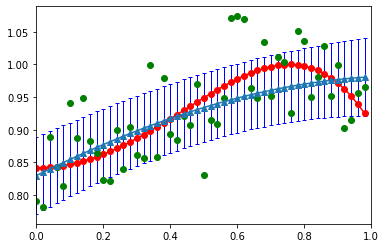

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33]


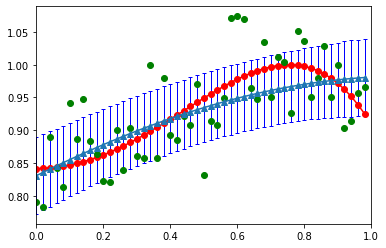

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14]


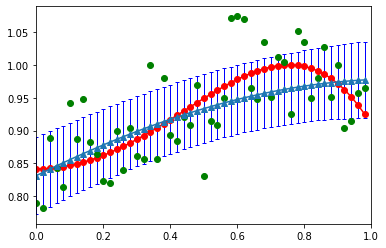

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44]


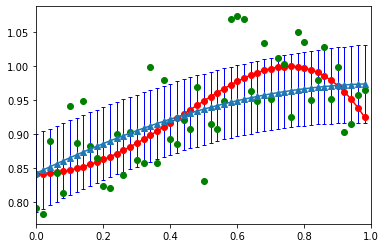

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5]


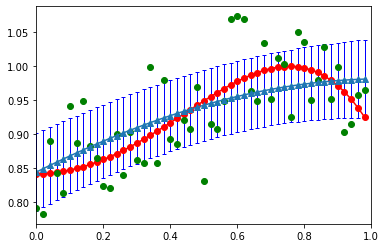

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30]


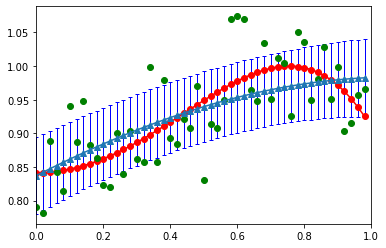

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11]


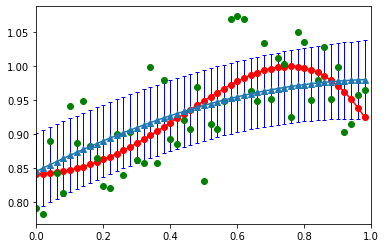

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7]


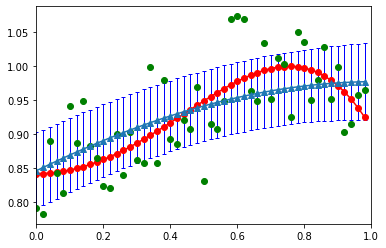

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48]


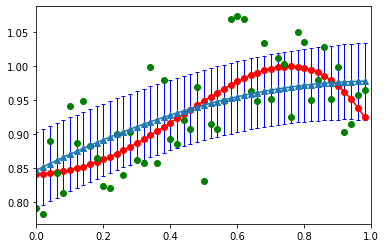

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24]


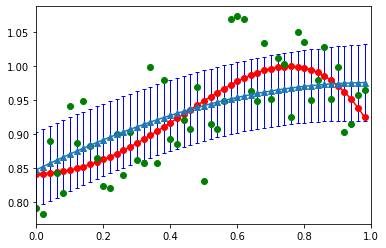

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41]


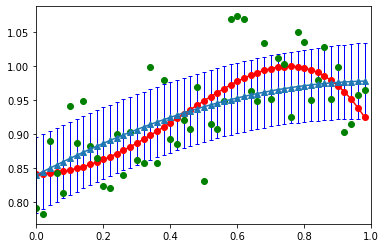

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1]


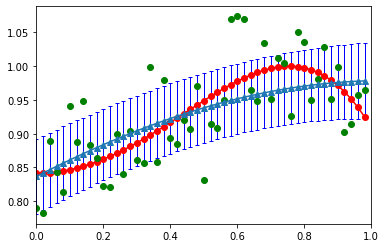

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16]


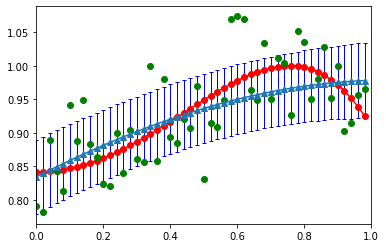

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18]


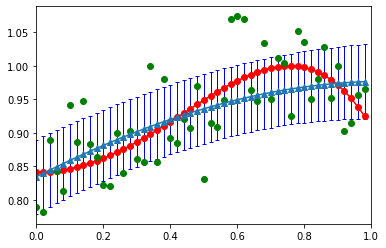

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49]


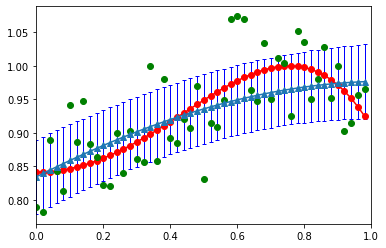

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22]


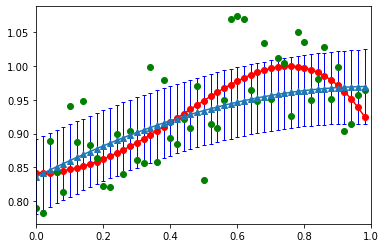

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46]


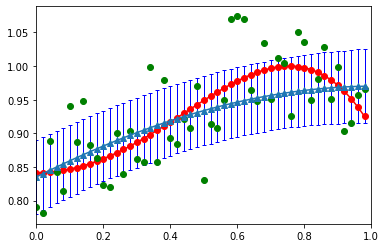

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9]


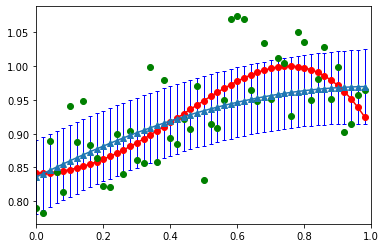

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8]


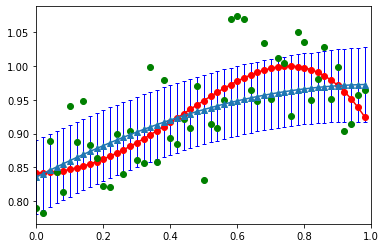

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36]


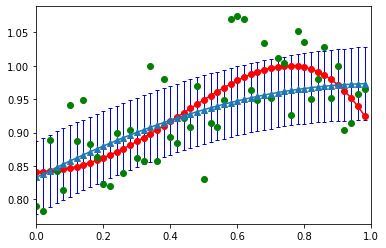

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13]


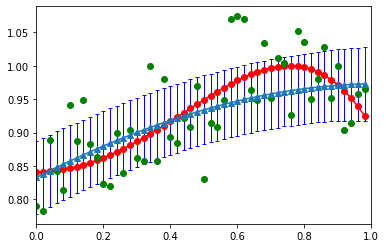

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35]


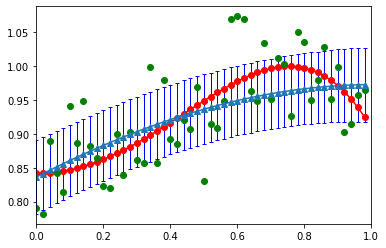

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17]


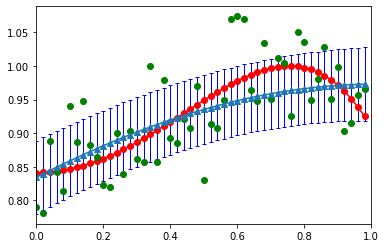

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15]


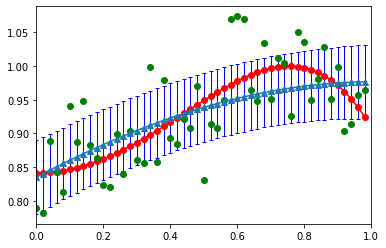

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29]


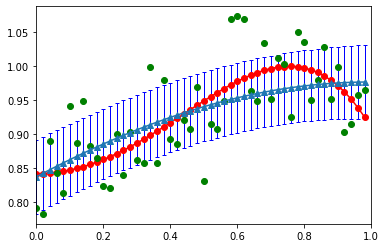

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19]


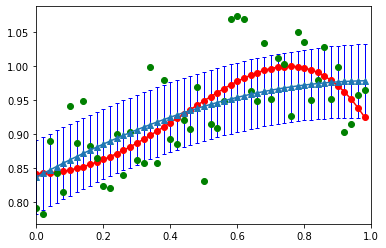

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45]


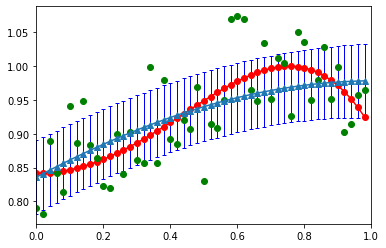

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23]


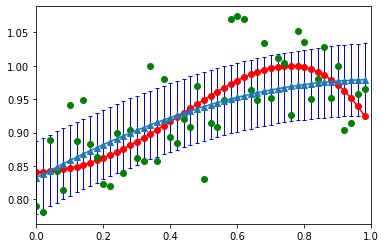

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10]


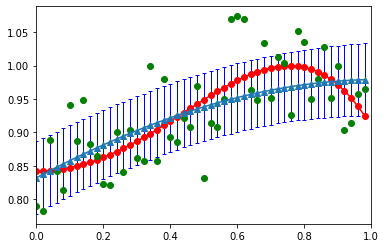

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20]


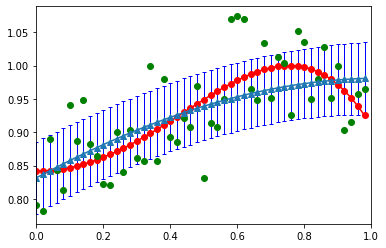

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20, 37]


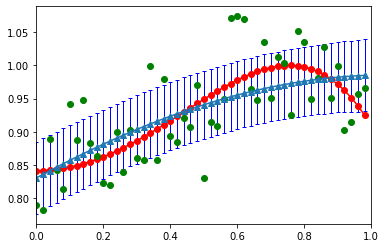

[6, 25, 38, 28, 34, 42, 26, 12, 21, 32, 4, 2, 43, 3, 31, 0, 47, 40, 27, 33, 14, 44, 5, 30, 11, 7, 48, 24, 41, 1, 16, 18, 49, 22, 46, 9, 8, 36, 13, 35, 17, 15, 29, 19, 45, 23, 10, 20, 37, 39]


In [10]:
gaussian_process(beta = 20, theta_0 = 1.0, theta_1 = 0.25, theta_2 = 0.0, theta_3 = 0.0)

11. Explain what the effects of changing to this kernel on the prediction.

As we can observe from the computation, the curve-fitting becomes much more underfitted than using the original kernel. The uncertainty range also is also stable throughout all graphs. 

Because the Gaussian processing replaces the basis function with kernels to support the expressiveness of curve-fitting/prediction, in order to find out the reason why such changes to the kernel will make the prediction more expressive and prone to overfit, we need to look at the kernel function and the effect of hyper-parameters.

As we can observe in the textbook page 308, if we decrease theta_1 from 4 to 0.25, we will observe that within the same horizontal and vertical range, the curve of kernel function has become much smoother, "relaxed" and fewer changes. All these features combined will mean less expressiveness support for curve-fitting. If we think of kernel function as a infinite number of basis function, it is quite similar to having sparser mu and extremely large standard deviation of basis. Hence the prediction/curve-fitting is more likely to be underfitting.